# Code to extract out the chi2 values for many different SNR values combinations.
Like excel sheet


In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
home = "/home/jneal/Phd/Analysis/fake_sims_with_var_teff1"
import pandas as pd
import sqlalchemy as sa
from bin.coadd_analysis_script import load_sql_table

/home/jneal/Phd/Codes/companion_simulations/bin/__init__.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/ipykernel/kern

In [2]:
# ls /home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/

In [3]:
noises=[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20,
        50, 100, 150, 250, 500, 1000, 2000, 5000, 1000000]
teffs = [2300, 3400, 4000]

In [4]:
pd.options.display.max_colwidth = 10
def load_min_chi2(teff, noises):
    df_store = pd.DataFrame()
    for snr in noises:   
        obsnum = 1
        starname = "NOISESCRIPT{}N{}".format(teff, snr)
        directory = os.path.join(home, "analysis", starname, "iam")
        
        dbname = f"{starname}-{obsnum}_coadd_iam_chisqr_results.db"
        try:
            table = load_sql_table(os.path.join(directory,dbname), verbose=False, echo=False)
        
            chi2_val = "coadd_chi2"
            dbdf = pd.read_sql(sa.select(table.c).order_by(table.c[chi2_val].asc()).limit(1), table.metadata.bind)
            dbdf["snr"] = snr   # Add SNR column
            df_store = dbdf.append(df_store)
        except Exception as e:
            print(e)
            print(f"Didn't get Database for {teff}-{snr}")
    df_store["median_alpha"] = df_store.apply(lambda row: np.median([row.alpha_1, row.alpha_2, row.alpha_3, row.alpha_4]), axis=1)
    return df_store


In [5]:
df_teff = []
for teff in teffs:
            df_teff.append(load_min_chi2(teff, noises))


Database does not just have 1 table. [], len=0
Didn't get Database for 2300-0

Accessing sqlite_db = sqlite:////home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/NOISESCRIPT2300N2000/iam/NOISESCRIPT2300N2000-1_coadd_iam_chisqr_results.db

cwd = /home/jneal/Phd/Codes/companion_simulations/Notebooks
(sqlite3.OperationalError) unable to open database file
Didn't get Database for 2300-2000
Database does not just have 1 table. [], len=0
Didn't get Database for 3400-0
Database does not just have 1 table. [], len=0
Didn't get Database for 3400-150
Database does not just have 1 table. [], len=0
Didn't get Database for 3400-1000

Accessing sqlite_db = sqlite:////home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/NOISESCRIPT3400N2000/iam/NOISESCRIPT3400N2000-1_coadd_iam_chisqr_results.db

cwd = /home/jneal/Phd/Codes/companion_simulations/Notebooks
(sqlite3.OperationalError) unable to open database file
Didn't get Database for 3400-2000
Database does not just have 1 table. [], len=

In [6]:
def analyse_min_chi(df, teff):
    print("\nHost Temperature = 5200 K, Companion Temperature = {}".format(teff))
    print(df[["snr", "coadd_chi2", "teff_1", "teff_2", "median_alpha"]])
    print()
    ax = df.plot(x="snr", y="teff_1", style="o-", logx=True)
    plt.axhline(y=5200, color="k", linestyle="--")
    ax.set_xlabel("SNR")
    ax.set_ylabel("Teff [K]")
    plt.title("Host Temperature")

    ax2 = df.plot(x="snr", y="teff_2", style="o-", logx=True )
    plt.axhline(y=teff, color="k", linestyle="--")
    ax2.set_xlabel("SNR")
    ax2.set_ylabel("Teff [K]")
    plt.title("Companion Temperature")

    ax3=df.plot(x="snr", y="coadd_chi2", style="o-", logx=True)
    plt.title("Chi squared")
    ax3.set_xlabel("SNR")
    ax3.set_ylabel("$\chi^2$")
  
    plt.show()
    


Host Temperature = 5200 K, Companion Temperature = 2300
       snr  coadd_chi2  teff_1  teff_2  median_alpha
0  1000000     0.1419   5200.0    2400    0.03505   
0     5000     0.1420   5200.0    2400    0.03505   
0     1000     0.1436   5200.0    2400    0.03505   
0      500     0.1531   5100.0    2400    0.03725   
0      250     0.1876   5100.0    2400    0.03725   
0      150  7953.4318   5100.0    2400    0.03725   
0      100     0.4297   5100.0    2400    0.03725   
0       50     1.2598   5200.0    2400    0.03505   
0       20     6.8653   5100.0    2400    0.03725   
0       18     8.2393   5100.0    2300    0.03040   
0       16    10.8046   5200.0    2300    0.02865   
0       14    14.1226   5200.0    2600    0.04970   
0       12    19.1601   5400.0    2500    0.03720   
0       10    26.4686   5100.0    2900    0.08630   
0        8    44.2135   5400.0    2300    0.02540   
0        7    55.2118   5300.0    2300    0.02695   
0        6    75.3535   5400.0    4200    

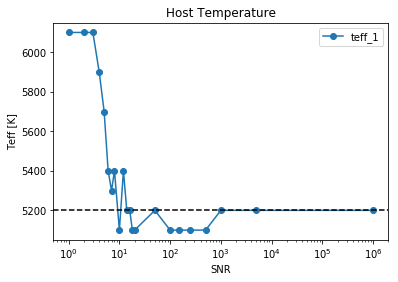

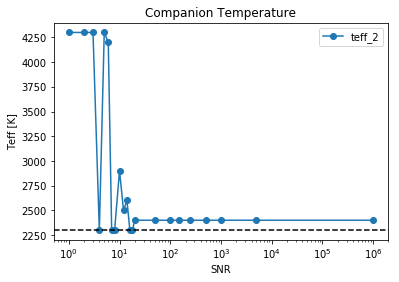

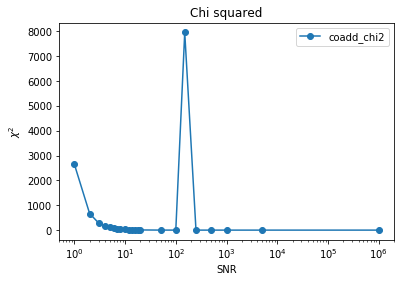


Host Temperature = 5200 K, Companion Temperature = 3400
       snr  coadd_chi2  teff_1  teff_2  median_alpha
0  1000000     0.2186   5100.0    3300    0.16305   
0     5000     0.2185   5100.0    3300    0.16305   
0      500     0.2186   5100.0    3300    0.16305   
0      250     0.2588   5100.0    3300    0.16305   
0      100     0.5067   5200.0    3300    0.15340   
0       50     1.3040   5100.0    3300    0.16305   
0       20     7.1355   5100.0    3300    0.16305   
0       18     9.1547   5100.0    3300    0.16305   
0       16    10.9762   5200.0    3300    0.15340   
0       14    13.7044   5200.0    3200    0.13075   
0       12    19.1344   5100.0    3300    0.16305   
0       10    27.6637   5200.0    3200    0.13075   
0        8    42.4062   5100.0    3600    0.25410   
0        7    56.5424   5300.0    3500    0.19585   
0        6    74.3978   5200.0    3700    0.27270   
0        5   111.2213   5100.0    2400    0.03725   
0        4   167.7031   5900.0    3700    

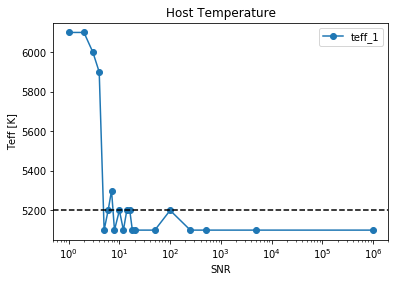

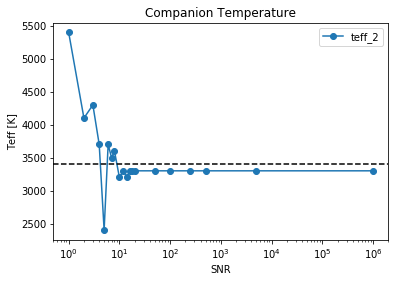

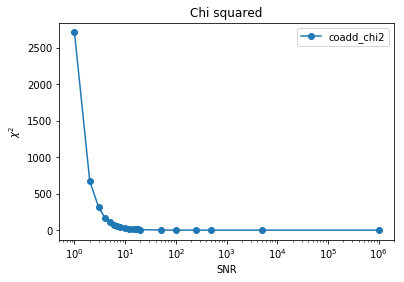


Host Temperature = 5200 K, Companion Temperature = 4000
       snr  coadd_chi2  teff_1  teff_2  median_alpha
0  1000000     0.0910   5200.0    4000    0.39325   
0     5000     0.0912   5200.0    4000    0.39325   
0     1000     0.0939   5200.0    4000    0.39325   
0      500     0.1011   5200.0    4000    0.39325   
0      250     0.1388   5200.0    4000    0.39325   
0      100     0.5419   4200.0    4800    1.58735   
0       50     1.1763   5200.0    4100    0.43985   
0       20     6.9957   5100.0    3800    0.32910   
0       18     8.2176   5100.0    4100    0.46755   
0       16    10.6718   5100.0    3800    0.32910   
0       14    14.2998   5100.0    4000    0.41800   
0       12    20.1230   5400.0    4000    0.34935   
0       10    27.7155   4200.0    5300    2.18135   
0        8    41.1470   5100.0    4000    0.41800   
0        7    55.8470   5200.0    4100    0.43985   
0        6    76.2745   4400.0    5100    1.61625   
0        5   108.8516   5800.0    4200    

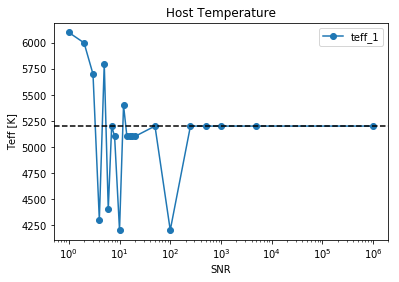

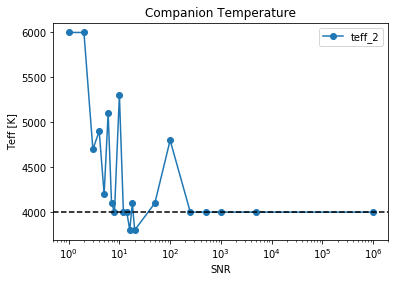

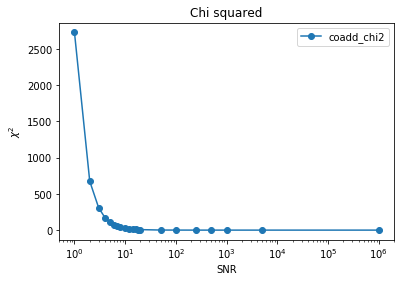

In [7]:
for i, teff in enumerate(teffs):
          analyse_min_chi(df_teff[i], teff)

In [8]:
# Single model simulations
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N0
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N20
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N50
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N100
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N1000


def load_min_bhm_chi2(teff, noises):
    df_store = pd.DataFrame()
    for snr in noises:   
        obsnum = 1
        starname = "BHMNOISESCRIPT{}N{}".format(teff, snr)
        directory = os.path.join(home, "analysis", starname, "bhm")
        
        dbname = f"{starname}-{obsnum}_coadd_bhm_chisqr_results.db"
        try:
            table = load_sql_table(os.path.join(directory,dbname), verbose=False, echo=False)
        
            chi2_val = "coadd_chi2"
            dbdf = pd.read_sql(sa.select(table.c).order_by(table.c[chi2_val].asc()).limit(1), table.metadata.bind)
            dbdf["snr"] = snr   # Add SNR column
            df_store = dbdf.append(df_store)
        except Exception as e:
            print(e)
            print(f"Didn't get Database for {teff}-{snr}")
    #df_store["median_alpha"] = df_store.apply(lambda row: np.median([row.alpha_1, row.alpha_2, row.alpha_3, row.alpha_4]), axis=1)
    return df_store


In [9]:
noises=[0,  20, 50, 100,  1000]
bhm_teffs = [5200]
df_bhm_teff = []
for teff in bhm_teffs:
            df_bhm_teff.append(load_min_bhm_chi2(teff, noises))



Accessing sqlite_db = sqlite:////home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/BHMNOISESCRIPT5200N0/bhm/BHMNOISESCRIPT5200N0-1_coadd_bhm_chisqr_results.db

cwd = /home/jneal/Phd/Codes/companion_simulations/Notebooks
(sqlite3.OperationalError) unable to open database file
Didn't get Database for 5200-0

Accessing sqlite_db = sqlite:////home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/BHMNOISESCRIPT5200N20/bhm/BHMNOISESCRIPT5200N20-1_coadd_bhm_chisqr_results.db

cwd = /home/jneal/Phd/Codes/companion_simulations/Notebooks
(sqlite3.OperationalError) unable to open database file
Didn't get Database for 5200-20

Accessing sqlite_db = sqlite:////home/jneal/Phd/Analysis/fake_sims_with_var_teff1/analysis/BHMNOISESCRIPT5200N50/bhm/BHMNOISESCRIPT5200N50-1_coadd_bhm_chisqr_results.db

cwd = /home/jneal/Phd/Codes/companion_simulations/Notebooks
(sqlite3.OperationalError) unable to open database file
Didn't get Database for 5200-50

Accessing sqlite_db = sqlite:////home/jneal/P

In [10]:
#/home/jneal/Phd/Analysis/sims_variable_params_same_snr/analysis/BHMNOISESCRIPT5200N50/bhm/BHMNOISESCRIPT520050-7_coadd_bhm_chisqr_results.db
def analyse_min_chi(df, teff):
    print("\nHost Temperature = {} K".format(teff))
    print(df[["snr", "coadd_chi2", "teff_1", "teff_2"]])#, "median_alpha"]])

    ax = df.plot(x="snr", y="teff_1", style="o-", logx=True )
    plt.axhline(y=teff, color="k", linestyle="--")
    ax.set_xlabel("SNR")
    ax.set_ylabel("Teff [K]")
    plt.title("Companion Temperature")

    ax3=df.plot(x="snr", y="coadd_chi2", style="o-", logx=True)
    plt.title("Chi squared")
    ax3.set_xlabel("SNR")
    ax3.set_ylabel("$\chi^2$")

    plt.show()
    


Host Temperature = 5200 K
       snr  coadd_chi2  teff_1  teff_2
0  1000000     0.1419   5200.0    2400
0     5000     0.1420   5200.0    2400
0     1000     0.1436   5200.0    2400
0      500     0.1531   5100.0    2400
0      250     0.1876   5100.0    2400
0      150  7953.4318   5100.0    2400
0      100     0.4297   5100.0    2400
0       50     1.2598   5200.0    2400
0       20     6.8653   5100.0    2400
0       18     8.2393   5100.0    2300
0       16    10.8046   5200.0    2300
0       14    14.1226   5200.0    2600
0       12    19.1601   5400.0    2500
0       10    26.4686   5100.0    2900
0        8    44.2135   5400.0    2300
0        7    55.2118   5300.0    2300
0        6    75.3535   5400.0    4200
0        5   105.9515   5700.0    4300
0        4   168.8721   5900.0    2300
0        3   290.7081   6100.0    4300
0        2   668.3728   6100.0    4300
0        1  2652.1021   6100.0    4300


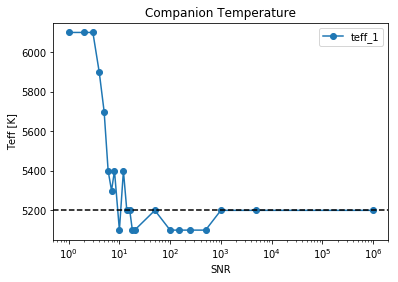

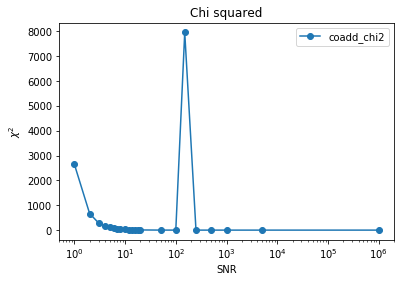

In [11]:
for i, teff in enumerate(bhm_teffs):
          analyse_min_chi(df_teff[i], teff)